In [1]:
# pip install ipympl
%matplotlib widget
%load_ext autoreload

In [54]:
%autoreload
from GarbageCollector import MemBalancer
from logparser import get_events_from, LogData, get_log_data_from_folder, get_stats_from_log_data
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from plotter import plot_gc, plot_membalancer_heap_rule, plot_full_gc_info, plot_benchmark_info
import numpy as np
from os import listdir
from os.path import isfile, join
import scipy.stats as st

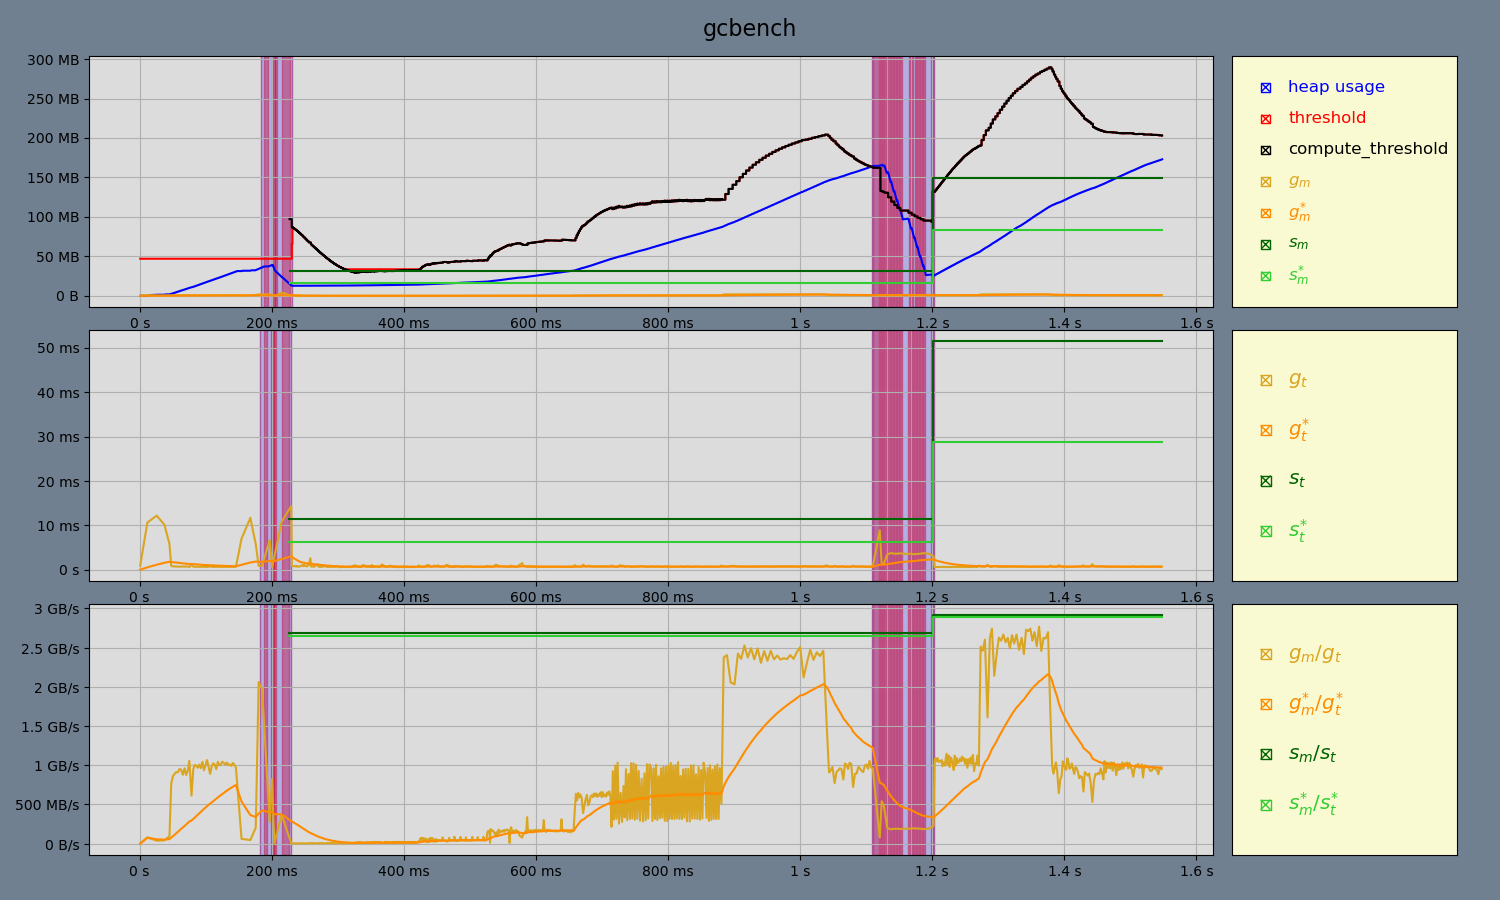

In [114]:
gcbench_data = LogData("logs/gcbench")
s_m_line = plot_full_gc_info(gcbench_data, "gcbench", 3)

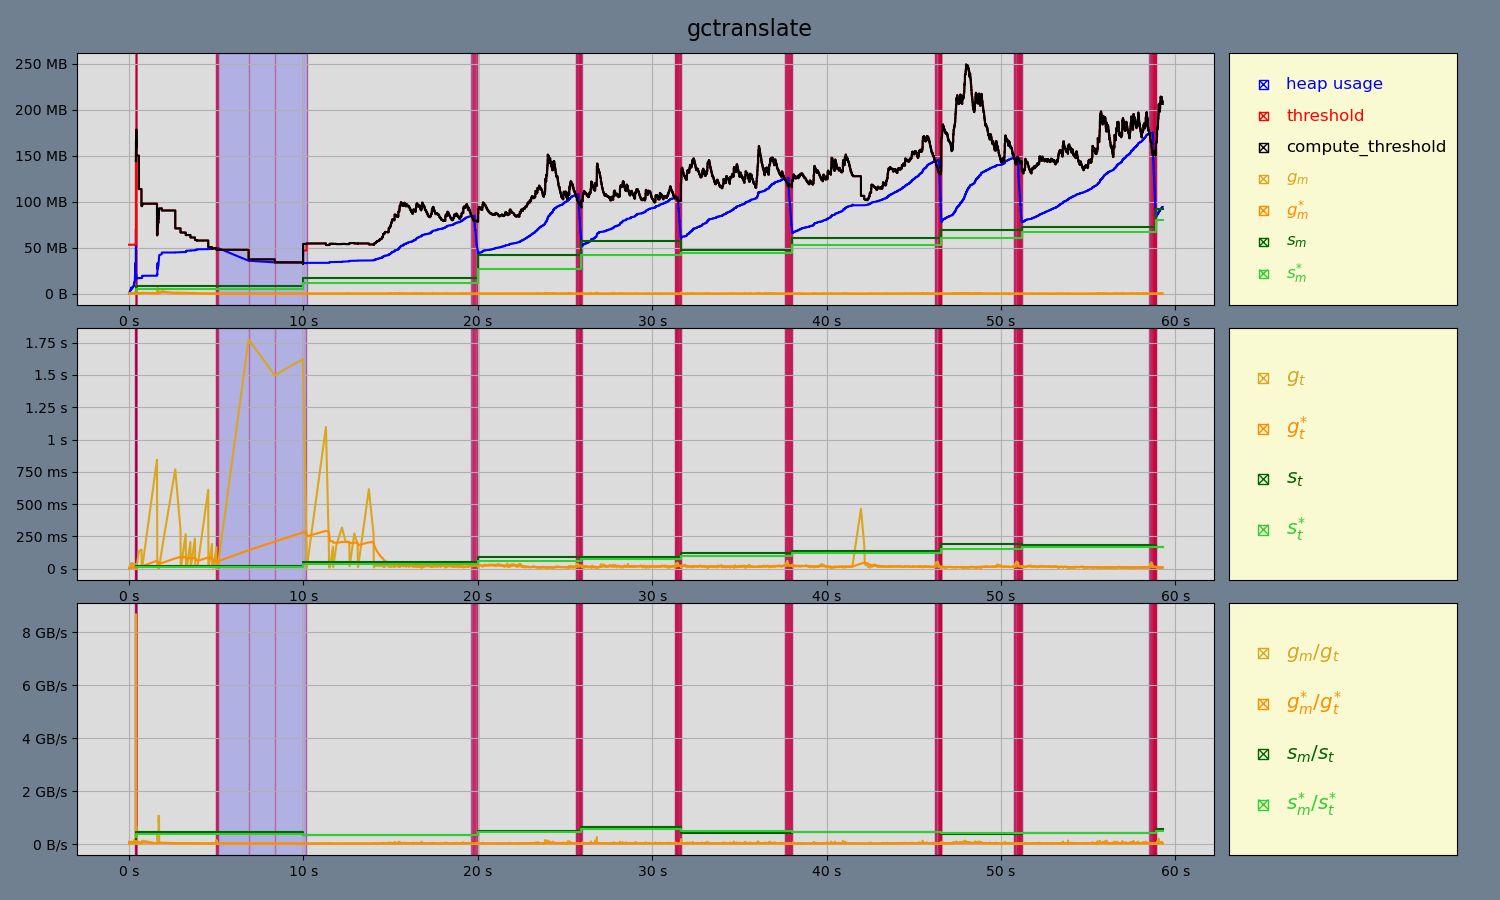

In [176]:
gctranslate_data = LogData("logs/gctranslate")
plot_full_gc_info(gctranslate_data, "gctranslate", 4)

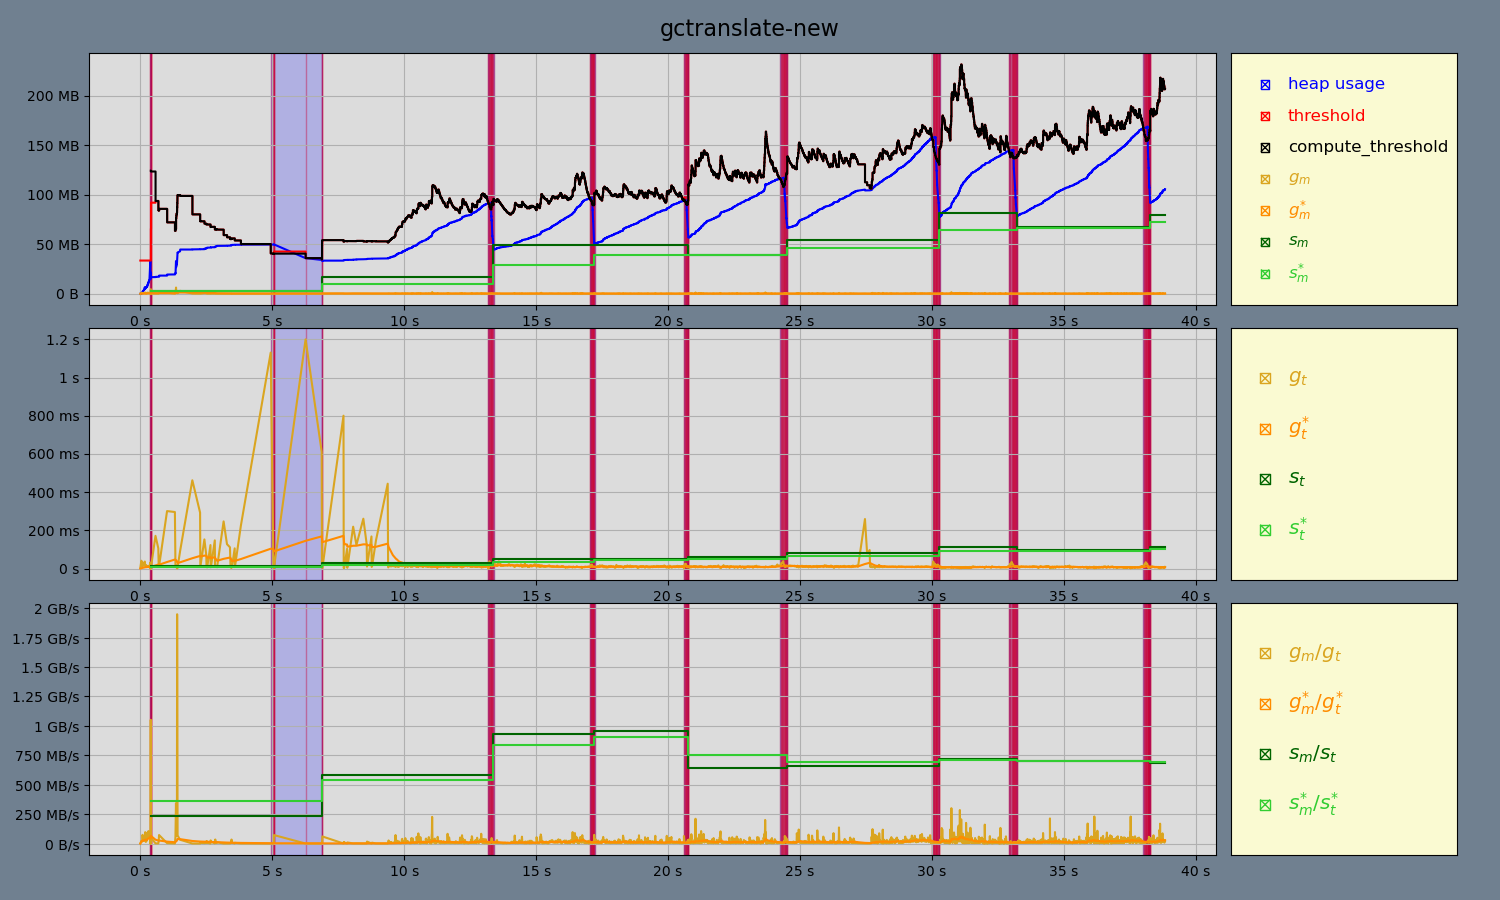

In [32]:
gctranslate2_data = LogData("logs/gctranslate-new")
plot_full_gc_info(gctranslate2_data, "gctranslate-new", 5)

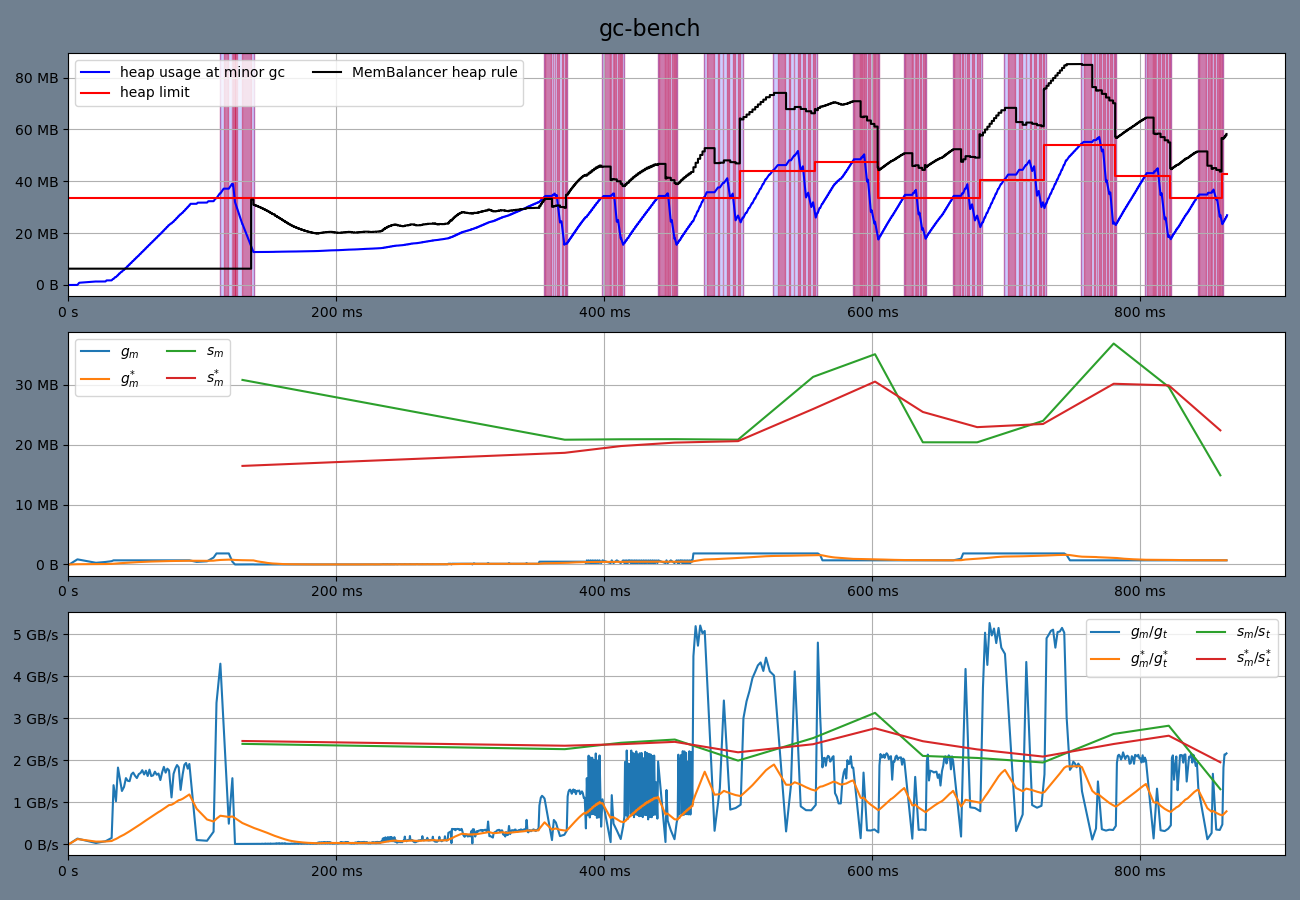

In [33]:
gcbench_events = get_events_from("logs/gcbench-old")
plot_gc(gcbench_events, "gc-bench", fig_num=1)
mem_balancer = MemBalancer(TUNING=1e-8, minimum_extra_heap=2*1024**2)
mem_balancer.L_smoothed = 1024
mem_balancer.s_m_smoothed = 2 * 1024**2
mem_balancer.s_t_smoothed = 1/2024
plot_membalancer_heap_rule(gcbench_events, mem_balancer,fig_num=1)
plt.xlim(left=0)
plt.show()


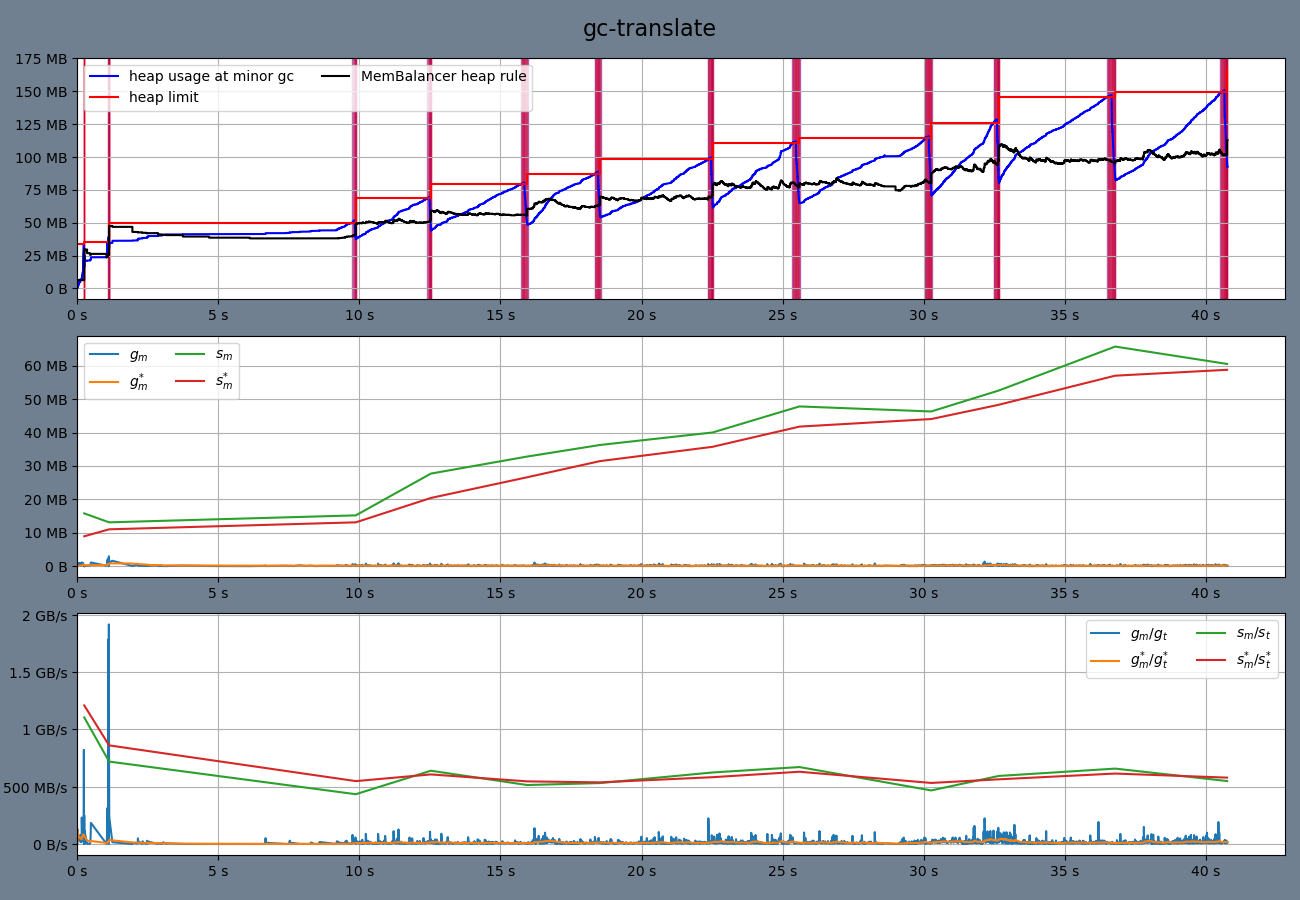

In [35]:
gctranslate_events = get_events_from("logs/gctranslate-old")
plot_gc(gctranslate_events, "gc-translate", fig_num=2)
mem_balancer = MemBalancer(TUNING=1e-8, minimum_extra_heap=2*1024**2)
mem_balancer.L_smoothed = 1024
mem_balancer.s_m_smoothed = 2 * 1024**2
mem_balancer.s_t_smoothed = 1/2024
plot_membalancer_heap_rule(gctranslate_events, mem_balancer, fig_num=2)
plt.xlim(left=0)
plt.show()

In [4]:
def get_tuning_factor(path):
    return float(path.split('/')[-1])

In [5]:
benchmark = []
source = "./logs/2024-07-24_14-48-03"
only_folder = [path for file in listdir(
    source) if not isfile(path := join(source, file))]
only_folder.sort(key=get_tuning_factor)
only_folder = only_folder
for folder in only_folder:
    benchmark.append(get_log_data_from_folder(folder))
tuning_factors = [round(get_tuning_factor(path)) for path in only_folder]

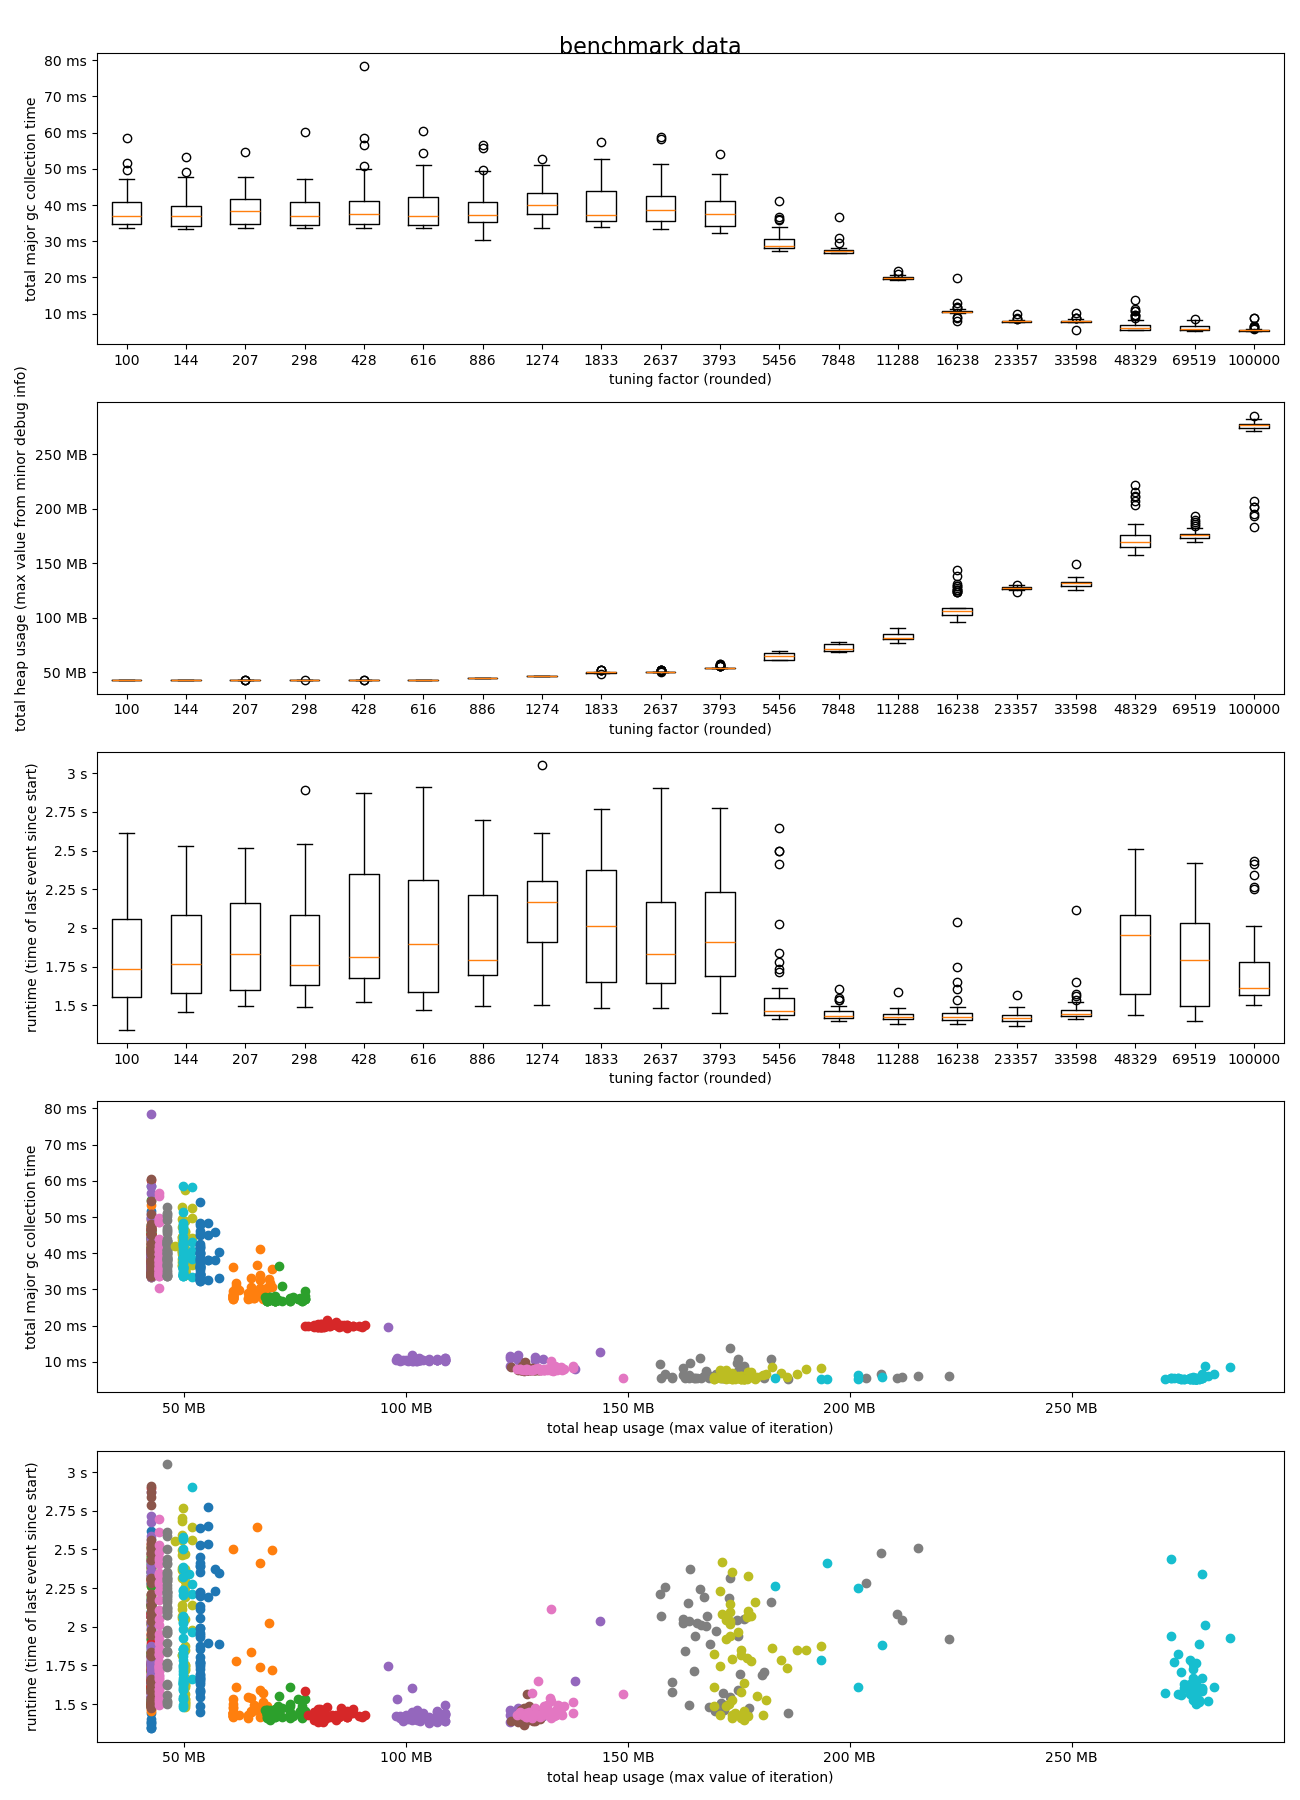

In [6]:
plot_benchmark_info(benchmark, tuning_factors, 42)

In [124]:
nums_of_major_gcs_per_param = [[prog_run.major_gcs for prog_run in bench] for bench in benchmark]
nums_of_minor_gcs_per_param = [[prog_run.minor_gcs for prog_run in bench] for bench in benchmark]
mean_number_of_major_gc = np.mean(nums_of_major_gcs_per_param, axis=1)
median_number_of_major_gc = np.median(nums_of_major_gcs_per_param, axis=1)
print(median_number_of_major_gc, mean_number_of_major_gc)

[16. 16. 16. 16. 16. 16. 16. 16. 15. 14. 13. 11.  9.  7.  5.  4.  4.  3.
  2.  2.] [16.   16.   16.   16.   16.   16.   16.   16.   15.   14.   13.   11.1
  9.    7.    4.8   4.    3.98  2.76  2.    2.  ]


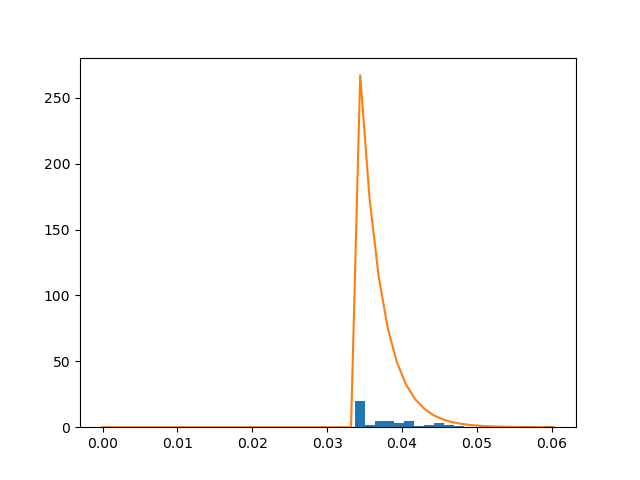

In [125]:
def reject_outliers(data, m=2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s <m]


data = np.array(total_major_gc_time_per_param[3])
b, loc, scale = st.pareto.fit(reject_outliers(data))
plt. figure()
plt.hist(data, bins= 20)
xs = np.linspace(0, max(data))
plt.plot(xs, st.pareto.pdf(xs, b,loc,scale))
plt.show()

In [57]:
frames, avg_frame = get_stats_from_log_data(benchmark, tuning_factors)
frames[0]

,max heap,total major gc time,runtime
0,42530008.0,0.042916,2.282404
1,42529912.0,0.038988,2.404631
2,42529912.0,0.035567,1.653496
3,42529840.0,0.042962,1.618055
4,42529888.0,0.046180,2.616141
5,42530088.0,0.034291,1.380987
6,42529848.0,0.051548,2.479585
7,42529824.0,0.039524,2.275206
8,42529912.0,0.039247,1.636576
9,42529776.0,0.034932,1.541066
